In [92]:
# Questions to solve

# Working with Britannia International Hotel Canary Wharf
# Countries that write the most reviews in general

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns; sns.set()
%matplotlib inline

from wordcloud import WordCloud

# Solve warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [108]:
df = pd.read_csv('../csv/Hotel_Reviews.csv')
df = df[['Hotel_Address', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Total_Number_of_Reviews', 'Positive_Review',
        'Reviewer_Score','lat', 'lng']]

In [109]:
# Checking the hotel with the highest number of reviews
df.pivot_table(index=['Hotel_Name'], aggfunc='size').nlargest()

Hotel_Name
Britannia International Hotel Canary Wharf           4789
Strand Palace Hotel                                  4256
Park Plaza Westminster Bridge London                 4169
Copthorne Tara Hotel London Kensington               3578
DoubleTree by Hilton Hotel London Tower of London    3212
dtype: int64

In [110]:
london = df[df['Hotel_Address'].str.contains(r'London')]

In [111]:
london['geom'] = london['lat'].map(str) + ',' + london['lng'].map(str)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [112]:
london.shape

(262301, 12)

In [113]:
hotel = df[df['Hotel_Name'] == 'Britannia International Hotel Canary Wharf']

Text(0, 0.5, 'Density')

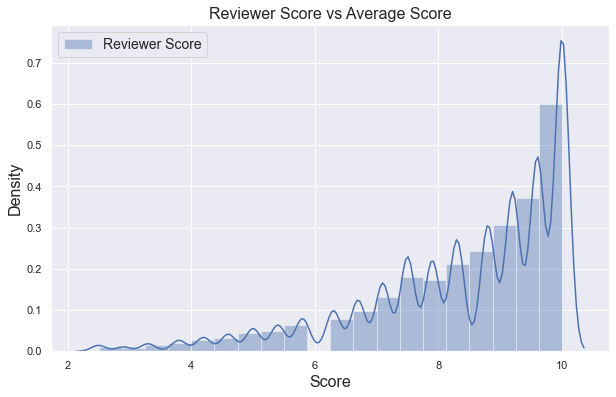

In [114]:
ax = plt.figure(figsize=(10,6))

# sns.distplot(df.Average_Score, label='Average Score')
sns.distplot(df.Reviewer_Score, label='Reviewer Score', bins=20)
plt.legend(fontsize=14)
plt.title("Reviewer Score vs Average Score", fontsize=16)
plt.xlabel('Score', fontsize=16)
plt.ylabel('Density', fontsize=16)

Text(0, 0.5, 'Density')

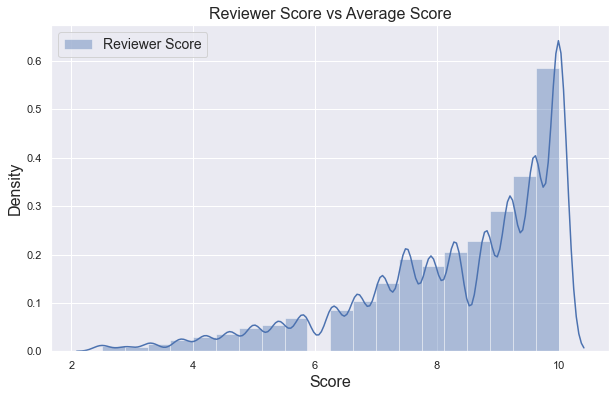

In [115]:
ax = plt.figure(figsize=(10,6))

# sns.distplot(df.Average_Score, label='Average Score')
sns.distplot(london.Reviewer_Score, label='Reviewer Score', bins=20)
plt.legend(fontsize=14)
plt.title("Reviewer Score vs Average Score", fontsize=16)
plt.xlabel('Score', fontsize=16)
plt.ylabel('Density', fontsize=16)

Text(0, 0.5, 'Density')

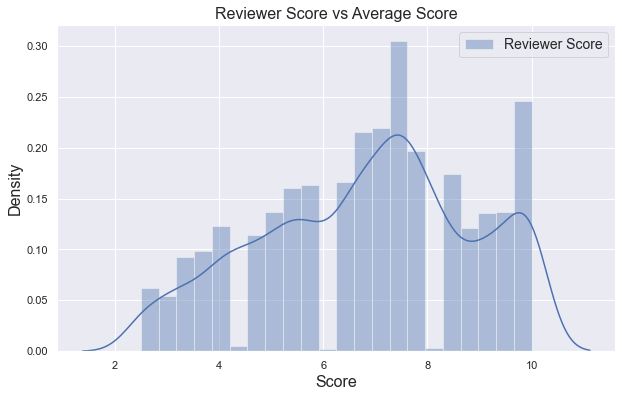

In [116]:
ax = plt.figure(figsize=(10,6))

# sns.distplot(df.Average_Score, label='Average Score')
sns.distplot(hotel.Reviewer_Score, label='Reviewer Score')
plt.legend(fontsize=14)
plt.title("Reviewer Score vs Average Score", fontsize=16)
plt.xlabel('Score', fontsize=16)
plt.ylabel('Density', fontsize=16)

In [117]:
df1 = df.groupby(by=['Reviewer_Nationality']).describe()
df2 = df1['Reviewer_Score'].nlargest(10,'count')

No handles with labels found to put in legend.


Text(0, 0.5, 'Density')

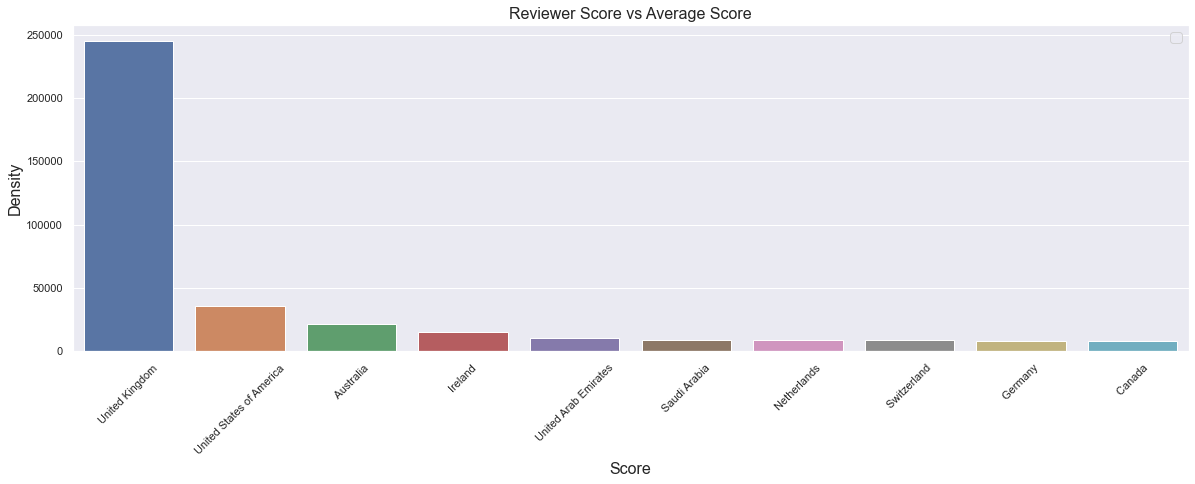

In [118]:
ax = plt.figure(figsize=(20,6))

sns.barplot(df2.index, df2['count'])
sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
plt.xticks(rotation=45)
plt.legend(fontsize=14)
plt.title("Reviewer Score vs Average Score", fontsize=16)
plt.xlabel('Score', fontsize=16)
plt.ylabel('Density', fontsize=16)

In [119]:
df1[['Average_Score']].head()

Average_Score                                           \
                             count      mean       std  min   25%  50%  75%   
Reviewer_Nationality                                                          
                             523.0  8.330019  0.565141  6.4  8.00  8.4  8.7   
 Abkhazia Georgia            153.0  8.371895  0.572099  6.4  8.10  8.4  8.7   
 Afghanistan                   8.0  8.225000  0.817225  6.8  7.75  8.6  8.7   
 Albania                     286.0  8.330769  0.533539  6.6  8.10  8.4  8.7   
 Algeria                     100.0  8.317000  0.552689  7.0  8.00  8.4  8.7   

                           
                      max  
Reviewer_Nationality       
                      9.6  
 Abkhazia Georgia     9.6  
 Afghanistan          9.2  
 Albania              9.4  
 Algeria              9.3

In [58]:
df1.nlargest(10, 'Average_Score')

,Reviewer_Nationality,Average_Score
54717,United States of America,9.8
54718,Taiwan,9.8
54719,Poland,9.8
54720,South Africa,9.8
54721,Qatar,9.8
54722,United Kingdom,9.8
54723,United Kingdom,9.8
54724,Australia,9.8
54725,United States of America,9.8
54726,United States of America,9.8
